In [18]:
!sudo add-apt-repository -y ppa:sumo/stable
!sudo apt-get update
!sudo apt-get install -y sumo sumo-tools sumo-doc

Repository: 'deb https://ppa.launchpadcontent.net/sumo/stable/ubuntu/ jammy main'
Description:
SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/sumo-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/sumo-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/sumo-ubuntu-stable.gpg with fingerprint 7604B28616B7E70EC0E6D840C32412BB1ADB414B
Get:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Hit:5 https://packages.cloud.google.com/apt google-fas

In [19]:
!source ~/.bashrc

In [20]:
#!echo 'export SUMO_HOME="/usr/share/sumo"' >> ~/.bashrc
import os
os.environ['SUMO_HOME'] = '/usr/share/sumo'
print(os.environ['SUMO_HOME'])


/usr/share/sumo


In [21]:
!export LIBSUMO_AS_TRACI=1 #Notice that you will not be able to run with sumo-gui or with multiple simulations in parallel if this is active (more details).

In [ ]:
#!unset LIBSUMO_AS_TRACI


In [22]:
!pip install sumo-rl

In [23]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 79.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.7 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446667 sha256=a03153834f0f9c9f5ffca65f893938e6b9061e9639d2f4f9f76d1834672b84c0
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.3.0
    Uninstalling Shimmy-1.3.0:
      Successfully uninstalled Shimmy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [8]:
import os

subfolder_path = "/kaggle/working/net"
os.makedirs(subfolder_path, exist_ok=True)

In [12]:
import shutil

#shutil.copy("/kaggle/input/netzip6/net/dqn_2way-single-intersection.py", "/kaggle/working/net/dqn_2way-single-intersection.py")
shutil.copy("/kaggle/input/net/single-intersection.net.xml", "/kaggle/working/net/single-intersection.net.xml")
shutil.copy("/kaggle/input/net/single-intersection-vhvh.rou.xml", "/kaggle/working/net/single-intersection-vhvh.rou.xml")


'/kaggle/working/net/single-intersection-vhvh.rou.xml'

In [13]:
!ls /kaggle/working/net


single-intersection-vhvh.rou.xml  single-intersection.net.xml


In [ ]:
#!python /kaggle/input/netzip6/net/dqn_2way-single-intersection.py

In [24]:
from stable_baselines3 import DQN
from stable_baselines3.common.utils import get_device

device = get_device("cuda")
print("DQN Device:", device)  # Should print "cuda"


DQN Device: cuda


In [25]:
import os
import sys
import gymnasium as gym
from stable_baselines3.dqn.dqn import DQN
#import traci
from sumo_rl import SumoEnvironment
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt


if "SUMO_HOME" in os.environ:
    tools = os.path.join(os.environ["SUMO_HOME"], "tools")
    sys.path.append(tools)
else:
    sys.exit("Please declare the environment variable 'SUMO_HOME'")

env=None
model=None
if __name__ == "__main__":
    
    log_dir = "/kaggle/working/log_dir"
    os.makedirs(log_dir, exist_ok=True)
    
    env = SumoEnvironment(
        net_file="/kaggle/working/net/single-intersection.net.xml",
        route_file="/kaggle/working/net/single-intersection-vhvh.rou.xml",
        out_csv_name="/kaggle/working/net/dqn",
        single_agent=True,
        use_gui=False,
        num_seconds=2000,
    )
    env = Monitor(env, log_dir)

    model = DQN(
        env=env,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=500,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=1,
        device="cuda"
    )
    model.learn(total_timesteps=2000)
    env.close()
    
    

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      
Using cuda device
Wrapping the env in a DummyVecEnv.
 Retrying in 1 seconds
Step #2000.00 (0ms ?*RT. ?UPS, TraCI: 40ms, vehicles TOT 1276 ACT 60 BUF 118)             
 Retrying in 1 seconds
Step #2000.00 (0ms ?*RT. ?UPS, TraCI: 27ms, vehicles TOT 1325 ACT 68 BUF 69)              
 Retrying in 1 seconds
Step #2000.00 (0ms ?*RT. ?UPS, TraCI: 12ms, vehicles TOT 1394 ACT 30 BUF 0)               
 Retrying in 1 seconds
Step #2000.00 (0ms ?*RT. ?UPS, TraCI: 14ms, vehicles TOT 1394 ACT 36 BUF 0)               
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 400      |
|    ep_rew_mean      | -14.8    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 32       |
|    time_elapsed     | 49       |
|    total_timesteps  | 1600     |
| tra

In [41]:
obs=env.reset()
(obs[0])

Step #0.00 (0ms ?*RT. ?UPS, TraCI: 2215ms, vehicles TOT 0 ACT 0 BUF 0)                   
 Retrying in 1 seconds


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [68]:
import numpy as np
# Test the trained model
print("Testing model...")
obs = env.reset()[0]
done = False
total_reward = 0

step=0
while not done:
    print("Shape of observation:", np.shape(obs[0]))
    action, _states = model.predict(obs, deterministic=True)  # Use deterministic for testing
    obs, reward, done, info,_ = env.step(int(action))
    total_reward += reward
    print(f"step {step} ,total reward {total_reward}")
    

print(f"Total reward achieved during testing: {total_reward}")

# Close the environment
env.close()

Testing model...
Step #5.00 (0ms ?*RT. ?UPS, TraCI: 37091ms, vehicles TOT 12 ACT 12 BUF 0)                 
 Retrying in 1 seconds
Shape of observation: ()
step 0 ,total reward 0.0
Shape of observation: ()
step 0 ,total reward 0.0
Shape of observation: ()
step 0 ,total reward -0.09
Shape of observation: ()
step 0 ,total reward -0.51
Shape of observation: ()
step 0 ,total reward -0.98
Shape of observation: ()
step 0 ,total reward -1.66
Shape of observation: ()
step 0 ,total reward -2.46
Shape of observation: ()
step 0 ,total reward -2.9
Shape of observation: ()
step 0 ,total reward -2.72
Shape of observation: ()
step 0 ,total reward -2.49
Shape of observation: ()
step 0 ,total reward -2.42
Shape of observation: ()
step 0 ,total reward -2.9
Shape of observation: ()
step 0 ,total reward -3.05
Shape of observation: ()
step 0 ,total reward -2.45
Shape of observation: ()
step 0 ,total reward -1.48
Shape of observation: ()
step 0 ,total reward -1.93
Shape of observation: ()
step 0 ,total rewa

ValueError: I/O operation on closed file.

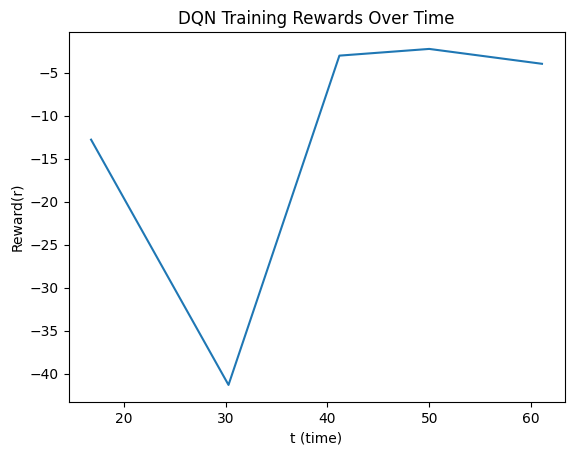

In [27]:
import ast

r = []
l = []
t = []
for file in os.listdir(log_dir):
    with open(os.path.join(log_dir, file), "r") as f:
        for line in list(f)[2:]:#skip first 2 lines
            line_sp=line.split(",")
            r.append(float(line_sp[0]))
            l.append(float(line_sp[1]))
            t.append(float(line_sp[2]))

    # Plotting the rewards per episode
plt.plot(t,r)
plt.title('DQN Training Rewards Over Time')
plt.xlabel('t (time)')
plt.ylabel('Reward(r)')
plt.show()